In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) #Adjuct the configuration of the plots we will create

In [3]:
#Read the Data
df = pd.read_csv(r"H:\Project_5_MovieCorelationWithPython\movies.csv")
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [4]:
#Find the missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing*100))
    
#Tot missing value (null cvalue)
# for col in df.columns:
#    print(df[col].isnull().value_counts(), "\n")

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [5]:
#Because there are a lot of NaN Value, so replace it
#To replace NaN Value with 0
df = df.replace(np.nan, 0)
# Or use 
#  df.fillna(0)

#Try to delete the NaN Value
#  df.dropna(inplace=True)
#  df

In [6]:
# Check NaN Value again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing*100))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
# Showing data types per column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change data types of budget column and gross column

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [9]:
#Check the data types again
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#To split released column into released date and country released
df[['released_date','country_released']] = df['released'].str.split('\(', n = 1 , expand = True)
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0.0    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime      released_date  \
0      46998772               Warner Bros.    146.0     June 13, 1980    
1      58853106          Columbia Pictures    104.0      July 2, 1980    
2     538375067                  Lucasfilm    124.0     June 20, 1980    
3      83453539         Paramount Pictures     88.0      July 2, 1980    
4      39846344             Orion Pictures     98.0     July 25, 1980    
...         ...                        ...      ...                ...   
7663          0                          0     90.0  October 23, 2020    
7664          0  Cactus Blue Entertainment     90.0  February 7, 2020    
7665          0           Embi Productions      0.0    April 27, 2020    
7666          0                          0    120.0   October 1, 2020    
7667          0                PK 65 Films    102.0   August 19, 2020    

     country_released  
0      United States)  
1      United States)  
2      United States)  
3      United States)  
4      United States)  
...               ...  
7663   United States)  
7664   United States)  
7665        Cameroon)  
7666   United States)  
7667   United States)  

[7668 rows x 17 columns]

In [11]:
# Clean the column of country relelased (replace ')' with 'space')
df['country_released'] = df['country_released'].str.replace(')','')
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0.0    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime      released_date  \
0      46998772               Warner Bros.    146.0     June 13, 1980    
1      58853106          Columbia Pictures    104.0      July 2, 1980    
2     538375067                  Lucasfilm    124.0     June 20, 1980    
3      83453539         Paramount Pictures     88.0      July 2, 1980    
4      39846344             Orion Pictures     98.0     July 25, 1980    
...         ...                        ...      ...                ...   
7663          0                          0     90.0  October 23, 2020    
7664          0  Cactus Blue Entertainment     90.0  February 7, 2020    
7665          0           Embi Productions      0.0    April 27, 2020    
7666          0                          0    120.0   October 1, 2020    
7667          0                PK 65 Films    102.0   August 19, 2020    

     country_released  
0       United States  
1       United States  
2       United States  
3       United States  
4       United States  
...               ...  
7663    United States  
7664    United States  
7665         Cameroon  
7666    United States  
7667    United States  

[7668 rows x 17 columns]

In [12]:
# Create new column of year from released date, 
# beacuse the old yaer column doesn't match with released date year 

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0.0    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime      released_date  \
0      46998772               Warner Bros.    146.0     June 13, 1980    
1      58853106          Columbia Pictures    104.0      July 2, 1980    
2     538375067                  Lucasfilm    124.0     June 20, 1980    
3      83453539         Paramount Pictures     88.0      July 2, 1980    
4      39846344             Orion Pictures     98.0     July 25, 1980    
...         ...                        ...      ...                ...   
7663          0                          0     90.0  October 23, 2020    
7664          0  Cactus Blue Entertainment     90.0  February 7, 2020    
7665          0           Embi Productions      0.0    April 27, 2020    
7666          0                          0    120.0   October 1, 2020    
7667          0                PK 65 Films    102.0   August 19, 2020    

     country_released yearcorrect  
0       United States        1980  
1       United States        1980  
2       United States        1980  
3       United States        1980  
4       United States        1980  
...               ...         ...  
7663    United States        2020  
7664    United States        2020  
7665         Cameroon   

In [13]:
# Order By Gross column
df.sort_values(by = ['gross'], inplace = False, ascending = False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century      0   Comedy  1989   
7667                                   Tee em el      0   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime  \
5445  2847246203            Twentieth Century Fox    162.0   
7445  2797501328                   Marvel Studios    181.0   
3045  2201647264            Twentieth Century Fox    194.0   
6663  2069521700                        Lucasfilm    138.0   
7244  2048359754                   Marvel Studios    149.0   
...          ...                              ...      ...   
1617           0          Gibraltar Entertainment     92.0   
1614           0                    Allied Vision     85.0   
1606           0  Trans World Entertainment (TWE)     89.0   
1601           0         Budapest Stúdió Vállalat    104.0   
7667           0                      PK 65 Films    102.0   

           released_date country_released yearcorrect  
5445  December 18, 2009     United States        2009  
7445     April 26, 2019     United States        2019  
3045  December 19, 1997     United States        1997  
6663  December 18, 2015     United States        2015  
7244     April 27, 2018     United States        2018  
...                  ...              ...         ...  
1617   January 26, 1990     United States        1990  
1614     April 14, 1989     United States        1989  
1606      April 7, 1989     United States        1989  
1601   January 13, 1990             

In [14]:
# To show all rows of dataframe
pd.set_option('display.max_rows', None)

In [15]:
# Drop(delete) duplicates od Data 

df = df.drop_duplicates()

#df['company'].sort_values(ascending=False)
# There is no duplicates in thisata set

# I'm not running it because it's too many :D

In [56]:
# To sort value by gross
df = df.sort_values(by = ['gross'], ascending = False)
df.head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime       released_date  \
5445  2847246203  Twentieth Century Fox    162.0  December 18, 2009    
7445  2797501328         Marvel Studios    181.0     April 26, 2019    
3045  2201647264  Twentieth Century Fox    194.0  December 19, 1997    
6663  2069521700              Lucasfilm    138.0  December 18, 2015    
7244  2048359754         Marvel Studios    149.0     April 27, 2018    

     country_released yearcorrect  
5445    United States        2009  
7445    United States        2019  
3045    United States        1997  
6663    United States        2015  
7244    United States        2018

In [55]:
# To delete column 'year' in data frame
#df = df.drop(columns = 'year')
df.head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime       released_date  \
5445  2847246203  Twentieth Century Fox    162.0  December 18, 2009    
7445  2797501328         Marvel Studios    181.0     April 26, 2019    
3045  2201647264  Twentieth Century Fox    194.0  December 19, 1997    
6663  2069521700              Lucasfilm    138.0  December 18, 2015    
7244  2048359754         Marvel Studios    149.0     April 27, 2018    

     country_released yearcorrect  
5445    United States        2009  
7445    United States        2019  
3045    United States        1997  
6663    United States        2015  
7244    United States        2018

## Find the correlation
1. Budget Correlation
2. Company Corretion



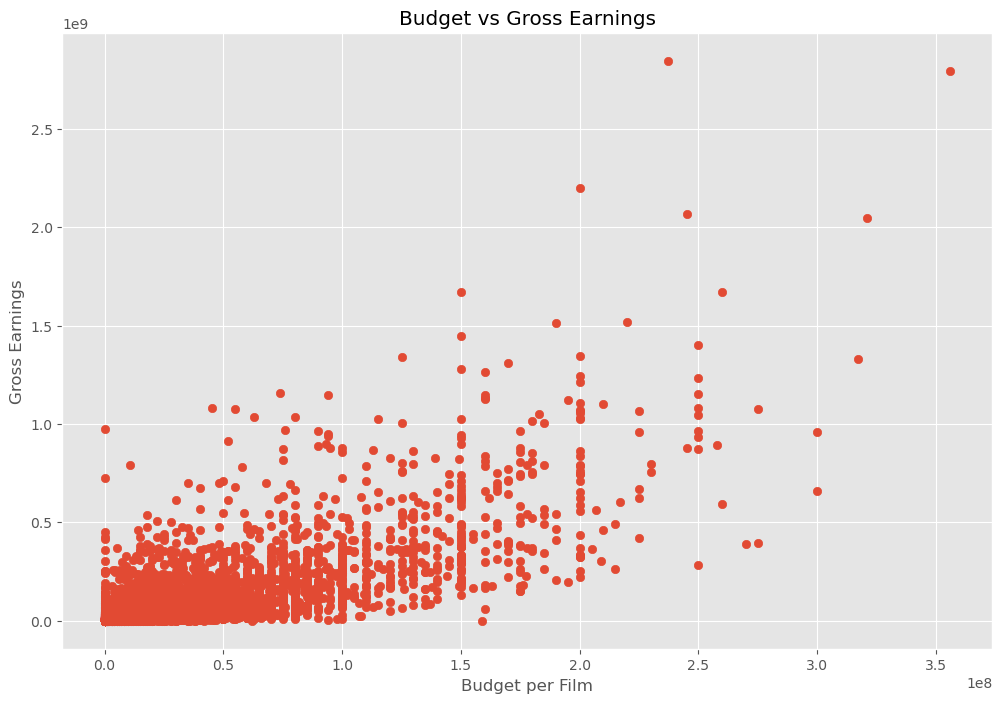

In [38]:
# Build Scatter Plot to find Correlation between Budget and Gross

plt.scatter(x=df['budget'], y=df['gross'])

# Add title and label
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget per Film')
plt.ylabel('Gross Earnings')

plt.show()

In [35]:
# Show top 5 of dataframe

df.head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime       released_date  \
5445  2847246203  Twentieth Century Fox    162.0  December 18, 2009    
7445  2797501328         Marvel Studios    181.0     April 26, 2019    
3045  2201647264  Twentieth Century Fox    194.0  December 19, 1997    
6663  2069521700              Lucasfilm    138.0  December 18, 2015    
7244  2048359754         Marvel Studios    149.0     April 27, 2018    

     country_released yearcorrect  
5445    United States        2009  
7445    United States        2019  
3045    United States        1997  
6663    United States        2015  
7244    United States        2018

<Axes: xlabel='budget', ylabel='gross'>

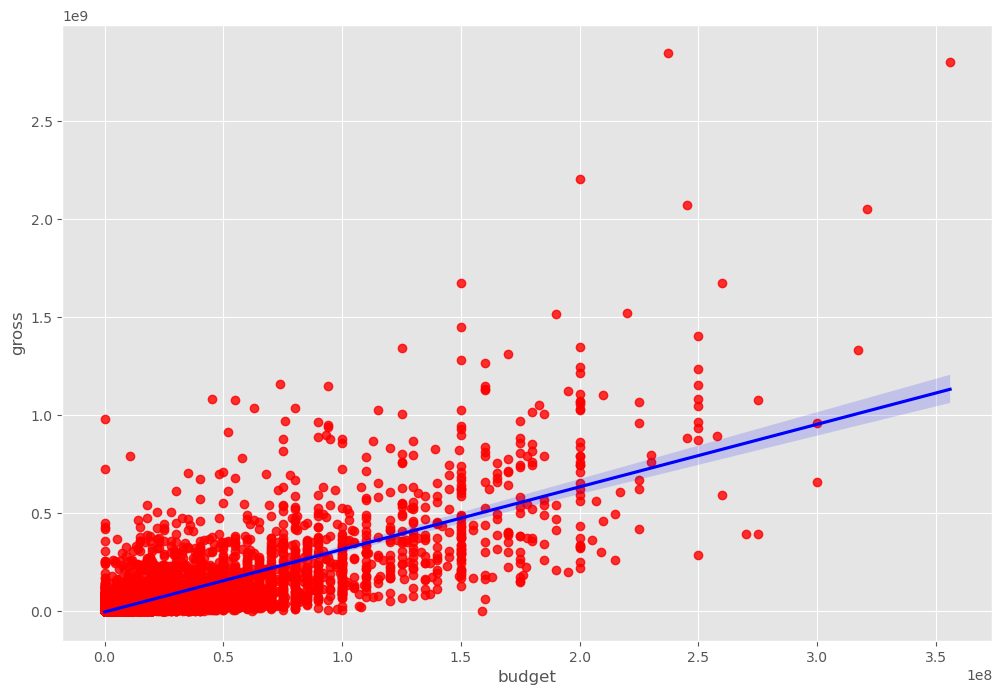

In [39]:
# Plot budget vs Gross Using Seaborn
# Seaborn is a library for making statistical graphic in Python

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws ={"color":"red"}, line_kws ={"color":"blue"})

In [40]:
# Find the correlation
# correlation only work in numerical field

#df.corr()
# ValueError: could not convert string to float: 'Avatar'

# So, change it to numeric_only
# Method, 'pearson', 'kendall', 'spearman'

df.corr(numeric_only = True, method = 'pearson') 

score     votes    budget     gross   runtime
score    1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.394564  0.306984  0.268372  0.244339  1.000000

In [41]:
df.corr(numeric_only = True, method = 'kendall') 

score     votes    budget     gross   runtime
score    1.000000  0.300673 -0.004843  0.091331  0.283601
votes    0.300673  1.000000  0.439883  0.560449  0.197697
budget  -0.004843  0.439883  1.000000  0.541956  0.176184
gross    0.091331  0.560449  0.541956  1.000000  0.177429
runtime  0.283601  0.197697  0.176184  0.177429  1.000000

In [42]:
df.corr(numeric_only = True, method = 'spearman') 

score     votes    budget     gross   runtime
score    1.000000  0.428810 -0.007002  0.133564  0.399868
votes    0.428810  1.000000  0.604693  0.752550  0.289359
budget  -0.007002  0.604693  1.000000  0.716816  0.246941
gross    0.133564  0.752550  0.716816  1.000000  0.257478
runtime  0.399868  0.289359  0.246941  0.257478  1.000000

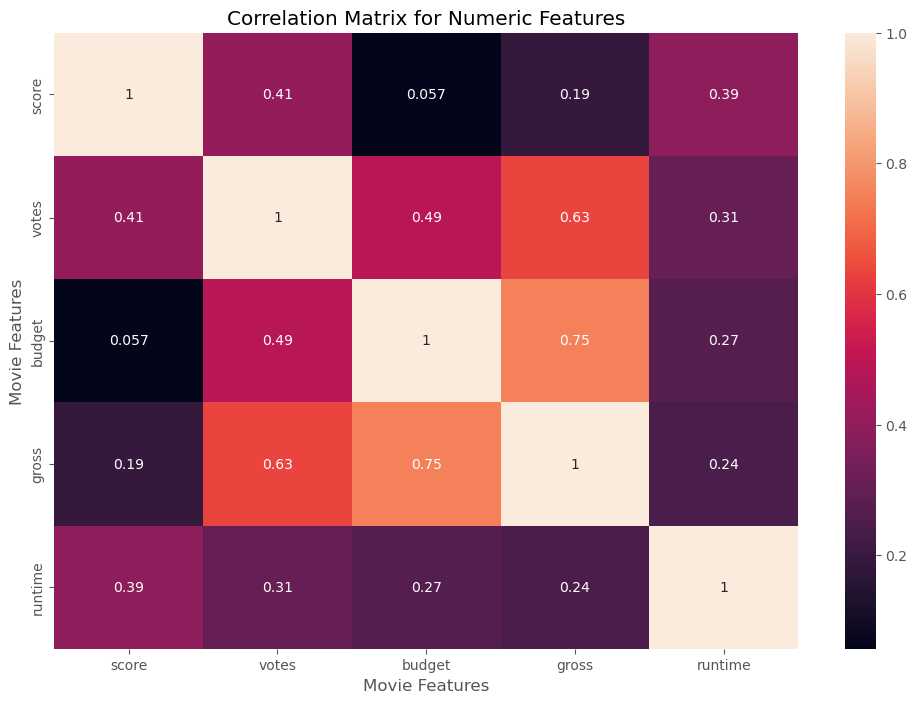

In [45]:
# Correlation between budget and Gross using seaborn

correlation_matrix = df.corr(numeric_only = True, method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True) # annot for showing the label in the middle

# Add title and label
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


In [46]:
# Numerized the dataframe
# Change the data type of 'object' to 'category', using for loop

df_numerized = df.copy() #Using copy of df, so the original still save

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes #cat.code gives the random numerization to gives 'code' number

df_numerized

name  rating  genre  released  score      votes  director  writer  star  \
5445   533       6      0       697    7.8  1100000.0      1155    1779  2335   
7445   535       6      0       184    8.4   903000.0       162     744  2242   
3045  6896       6      6       705    7.8  1100000.0      1155    1779  1596   
6663  5144       6      0       699    7.8   876000.0      1125    2551   525   
7244   536       6      0       193    8.4   897000.0       162     744  2242   
7480  6194       5      2      1489    6.9   222000.0      1455    1920   677   
6653  2969       6      0      1705    7.0   593000.0       517    3569   438   
6043  5502       6      0      2473    8.0  1300000.0      1517    2315  2242   
6646  2145       6      0       222    7.1   370000.0      1189     707  2722   
7494  2131       5      2      2677    6.8   148000.0       432    1951  1528   
6644   534       6      0      2236    7.3   777000.0      1517    2315  2242   
7247   791       6      0       960    7.3   661000.0      2457    3796   386   
5845  2407       6      1      1446    8.1   790000.0       679    4053   553   
7075  5145       6      0       662    7.0   581000.0      2282    3519   525   
7271  2970       6      0      1800    6.2   277000.0      1121    1094   438   
6262  2130       5      2      2716    7.4   585000.0       432    1951  1528   
7072   657       5      7      2023    7.1   283000.0       250    4001   771   
7281  2760       5      2      1730    7.6   263000.0       303     492   509   
7055  5833       6      0        62    6.6   214000.0       835    1432  2722   
6244  2823       6      0      2450    7.1   779000.0      2543    1175  2242   
6688  3622       5      2      1396    6.4   218000.0      1639     535  2348   
6846  1056       6      0      2489    7.8   694000.0       162     744   425   
7250   474       6      0       749    6.9   404000.0      1189     991  1138   
4245  6221       6      0       681    8.9  1700000.0      2193    1746   731   
7458  5084       6      0      1502    7.5   359000.0      1463     705  2644   
7456  1061       6      0      2214    6.8   478000.0       147     256   320   
5878  6968       6      0      1871    6.2   390000.0      1886    1238  2445   
6059  4951       6      0      2805    7.7   642000.0      2476    3126   545   
6494  6967       6      0      1850    5.6   302000.0      1886    1238  1752   
2448  6194       2      2      1812    8.5   970000.0      2415    1703  1798   
6047  5726       6      0      1511    8.4  1600000.0       483    2266   443   
7463  5141       6      0       732    6.5   394000.0      1125     715   525   
7450  2930       7      5      3063    8.4  1000000.0      2767    4249  1257   
7488  6949       2      2      1788    7.7   217000.0      1509    2159  2641   
5685  6948       2      2      1753    8.2   776000.0      1678    2159  2641   
4852  4258       6      0      1646    7.3   668000.0       996    4148  1322   
6869  4616       6      0       674    7.8   572000.0       912     718   818   
7481   290       5      1      2395    6.9   239000.0      1031    2079  2762   
5860  4261       6      0      2351    6.6   492000.0      2341    4148  1322   
7140  1552       5      2      1897    6.3   119000.0      1639     759  2505   
2245  2967       6      0      1690    8.1   894000.0      2660    2932  2330   
6908  1978       5      2      1745    7.3   250000.0       124     216   748   
3451  5138       5      0      2319    6.5   748000.0       963    1473   804   
5667   300       5      1      2183    6.4   392000.0      2745    2608  1847   
6863  7504       5      2      2176    8.0   450000.0       362     577   906   
6045  6001       6      1       652    7.8   773000.0      2193    1360  1762   
3843  2412       5      1      2594    7.6   685000.0       435    1742   553   
5243  5725       6      0      1477    9.0  2400000.0       483    2266   443   
5652  2406       6      1      2621  

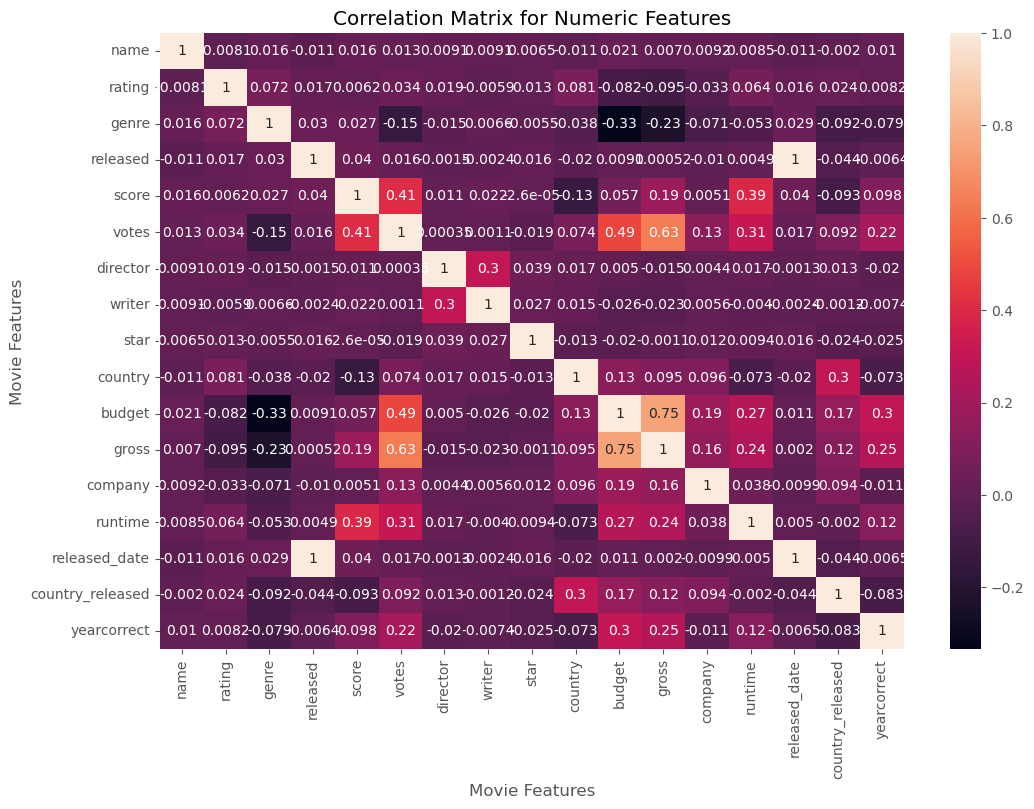

In [48]:
# Correlation between budget and Gross using seaborn

correlation_matrix = df_numerized.corr(numeric_only = True, method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True) # annot for showing the label in the middle

# Add title and label
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [49]:
# To looking the highes correlation quickly using 'unstacking'

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name              name                1.000000
                  rating             -0.008069
                  genre               0.016355
                  released           -0.011311
                  score               0.016377
                  votes               0.013038
                  director            0.009079
                  writer              0.009081
                  star                0.006472
                  country            -0.010737
                  budget              0.020548
                  gross               0.006989
                  company             0.009211
                  runtime             0.008483
                  released_date      -0.011223
                  country_released   -0.001968
                  yearcorrect         0.010071
rating            name               -0.008069
                  rating              1.000000
                  genre               0.072423
                  released            0.016613
             

In [53]:
# Sort the corr_pairs
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre             budget             -0.334021
budget            genre              -0.334021
gross             genre              -0.234297
genre             gross              -0.234297
votes             genre              -0.145296
genre             votes              -0.145296
country           score              -0.133346
score             country            -0.133346
gross             rating             -0.095450
rating            gross              -0.095450
score             country_released   -0.092741
country_released  score              -0.092741
genre             country_released   -0.091572
country_released  genre              -0.091572
                  yearcorrect        -0.083373
yearcorrect       country_released   -0.083373
budget            rating             -0.081939
rating            budget             -0.081939
yearcorrect       genre              -0.078972
genre             yearcorrect        -0.078972
country           runtime            -0.073319
runtime      

In [54]:
# Filter sorted pairs that has value 0.5

high_pairs = sorted_pairs[(sorted_pairs) > 0.5]
high_pairs

gross             votes               0.632870
votes             gross               0.632870
budget            gross               0.750157
gross             budget              0.750157
released_date     released            0.999912
released          released_date       0.999912
name              name                1.000000
star              star                1.000000
released_date     released_date       1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
writer            writer              1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
released          released            1.000000
genre             genre               1.000000
rating            rating              1.000000
country_relea

## The Conclution : votes and budget have the highest correlation to gross earnings
    